In [1]:
# Imports
import matplotlib.pyplot as plt
import math

In [2]:
# Set Lists
STOP_WORDS = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as","at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "can","could", "did", "do", "does", "doing", "done", "down", "during", "each", "few", "for", "from", "further", "had", "has","have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it","it's", "its", "itself", "just","let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once","only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she","she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their","theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was","we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "will","why", "why's", "with", "would", "you", "you'd","you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
SENTENCE_STOPPERS = ["?","!",".","-"]

In [3]:
# Functions


def cut(text,text_clean):
    for line in text:
        line = line[:-1]
        if line == "":
            continue
        else:
            text_clean.append(line)
    return text_clean


def lower(author_lines,lower_text,lower_lines):
    for line in author_lines:
        lower_text = line.lower()
        lower_lines.append(lower_text)
    return lower_lines


def comma(lower_text, current_line, low_text_clean):
    for line in lower_text:
        lines = line.split()
        for word in lines:
            if word[-1] == ",":
                word = word[:-1]
                current_line.append(word)
            else:
                current_line.append(word)
        low_text_clean.append(current_line)
        current_line = []
    return low_text_clean


def sentence(low_text_clean, author_list, current_sentence):
    for line in low_text_clean:
        for word in line:
            if word == "v.":
                continue
            elif word[-1] in SENTENCE_STOPPERS:
                current_sentence.append(word[:-1])
                author_list.append(current_sentence)
                current_sentence = []
            else: 
                current_sentence.append(word)
        current_sentence = []
    return author_list


def clear_stops(author_list,current_sentence,cleared_sentence):
    for line in author_list:
        for word in line:
            if word in STOP_WORDS:
                continue
            else:
                current_sentence.append(word)
        cleared_sentence.append(current_sentence)
        current_sentence = []
    return cleared_sentence


def normal(sentence,normal_sentence):
    for line in sentence:
        x = line
        normal = x/((x**(2) + 15)**(1/2))
        normal_sentence.append(normal)
    return normal_sentence




def mean (some_list):
    list_sum = 0
    for num in some_list:
        list_sum += num
    avg = list_sum/len(some_list)
    return avg

def median (some_list):
    list_sort = sorted(some_list) 
    mid_i = len(list_sort) // 2
    right_mid = len(list_sort) // 2 - 1
    if len(list_sort) % 2 == 1:
        med = list_sort[mid_i]
    else:
        med = (list_sort[mid_i] + list_sort[right_mid]) / 2
 
    return med
    
def variance (some_list):
    current_mean = mean(some_list)
    current_sum = 0
    for number in some_list:
        current_sum += (number - current_mean)**2

    var = current_sum/len(some_list)

    return var

def stdev (some_list):
    dev = (variance(some_list))**(1/2)
    return dev


In [4]:
# Open the Texts
with open("sentence_analysis_speech.txt") as t:
    speech = t.readlines()


with open("sentence_analysis_neg_words.txt") as n:
    neg = n.readlines()


with open("sentence_analysis_pos_words.txt") as p:
    pos = p.readlines()


with open("sentence_analysis_vader_lexicon_polarity_values.txt") as v:
    vader = v.readlines()








pos_clean = []
neg_clean = []
vader_clean = []
speech_lines = []
clean_pos = cut(pos,pos_clean)
clean_neg = cut(neg,neg_clean)



clean_vader = cut(vader,vader_clean)
vader_lines = []
for line in clean_vader:
    lines = line.split()
    line = lines[:2]
    vader_lines.append(line)


clean_speech = cut(speech[8:],speech_lines)


In [5]:
# Organize Speech by speaker
harris_lines = []
trump_lines = []
moderator_lines = []
for line in clean_speech:
    lines = line.split()
    if lines[0] == "HARRIS:":
        harris_lines.append(line[8:])
    if lines[0] == "TRUMP:":
        trump_lines.append(line[7:])
    if lines[0] == "MUIR:":
        moderator_lines.append(line[6:])
    if lines[0] == "DAVIS:":
        moderator_lines.append(line[7:])

In [6]:
# HARRIS



# Get individual speaker speech
# print(harris_lines)


# all lowercase
harris_lower_text = []
lower_harris = []
lower_harris = lower(harris_lines, harris_lower_text, lower_harris)
# print(lower_harris)


# no commas
clean_low_harris = []
current_line = []
clean_low_harris = comma(lower_harris, current_line, clean_low_harris)
# print(clean_low_harris)


# separate into sentences
current_sentence = []
harris_sentence_list = []
harris_sentence_list = sentence(clean_low_harris,harris_sentence_list,current_sentence)
# print(harris_sentence_list)


# remove stop words 
done_harris_sentences = []
current_sentence = []

done_harris_sentences = clear_stops(harris_sentence_list,current_sentence,done_harris_sentences)
# print(done_harris_sentences)


# 3.


# give words a vader polarity

# print(vader_lines) 
first_elements = []
polarity_element = []

for sublist in vader_lines:
    first_elements.append(sublist[0])
    polarity_element.append(sublist[1])

sentence_sum = []
sentences = []
for line in done_harris_sentences:
    # print(line)
    for word in line:
        if word in clean_pos:
            sentence_sum.append(.293)
        if word in clean_neg:
            sentence_sum.append(-.293)
        if word in first_elements:
            index = first_elements.index(word)
            sentence_sum.append(float(polarity_element[index]))
    sentences.append(sum(sentence_sum))
    sentence_sum = []
# print(sentences)



# normalize sentences 
harris_normal = []
harris_normal = normal(sentences, harris_normal)
# print(harris_normal)

In [7]:
# TRUMP


# HARRIS



# Get individual speaker speech
# print(harris_lines)


# all lowercase
trump_lower_text = []
lower_trump = []
lower_trump = lower(trump_lines, trump_lower_text, lower_trump)
# print(lower_trump)


# no commas
clean_low_trump = []
current_line = []
clean_low_trump = comma(lower_trump, current_line, clean_low_trump)
# print(clean_low_trump)


# separate into sentences
current_sentence = []
trump_sentence_list = []
trump_sentence_list = sentence(clean_low_trump,trump_sentence_list,current_sentence)
# print(trump_sentence_list)


# remove stop words 
done_trump_sentences = []
current_sentence = []
done_trump_sentences = clear_stops(trump_sentence_list,current_sentence,done_trump_sentences)
# print(done_trump_sentences)


# 3.


# give words a vader polarity

first_elements = []
polarity_element = []

for sublist in vader_lines:
    first_elements.append(sublist[0])
    polarity_element.append(sublist[1])

sentence_sum = []
sentences = []
for line in done_trump_sentences:
    # print(line)
    for word in line:
        if word in clean_pos:
            sentence_sum.append(.293)
        if word in clean_neg:
            sentence_sum.append(-.293)
        if word in first_elements:
            index = first_elements.index(word)
            sentence_sum.append(float(polarity_element[index]))
    sentences.append(sum(sentence_sum))
    sentence_sum = []
# print(sentences)



# normalize sentences 
trump_normal = []
trump_normal = normal(sentences, trump_normal)
# print(trump_normal)


In [8]:
# MODERATORS



# Get individual speaker speech
# print(moderator_lines)


# all lowercase
moderator_lower_text = []
lower_moderator = []
lower_moderator = lower(moderator_lines, moderator_lower_text, lower_moderator)
# print(lower_moderator)


# no commas
clean_low_moderator = []
current_line = []
clean_low_moderator = comma(lower_moderator, current_line, clean_low_moderator)
# print(clean_low_moderator)


# separate into sentences
current_sentence = []
moderator_sentence_list = []
moderator_sentence_list = sentence(clean_low_moderator,moderator_sentence_list,current_sentence)
# print(moderator_sentence_list)


# remove stop words 
done_moderator_sentences = []
current_sentence = []
done_moderator_sentences = clear_stops(moderator_sentence_list,current_sentence,done_moderator_sentences)
# print(done_moderator_sentences)


# 3.


# give words a vader polarity

first_elements = []
polarity_element = []

for sublist in vader_lines:
    first_elements.append(sublist[0])
    polarity_element.append(sublist[1])

sentence_sum = []
sentences = []
for line in done_moderator_sentences:
    # print(line)
    for word in line:
        if word in clean_pos:
            sentence_sum.append(.293)
        if word in clean_neg:
            sentence_sum.append(-.293)
        if word in first_elements:
            index = first_elements.index(word)
            sentence_sum.append(float(polarity_element[index]))
    sentences.append(sum(sentence_sum))
    sentence_sum = []
# print(sentences)



# normalize sentences 
moderator_normal = []
moderator_normal = normal(sentences, moderator_normal)
# print(moderator_normal)



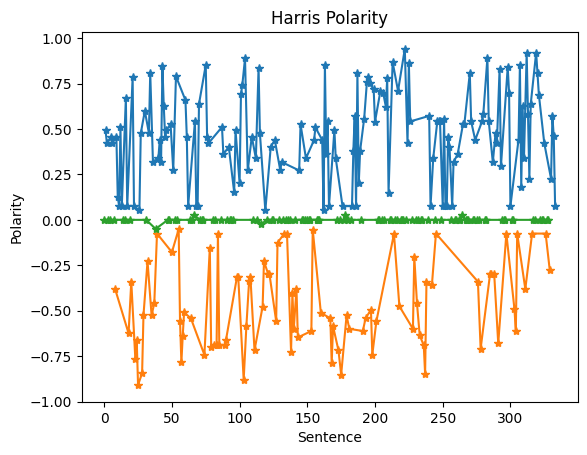

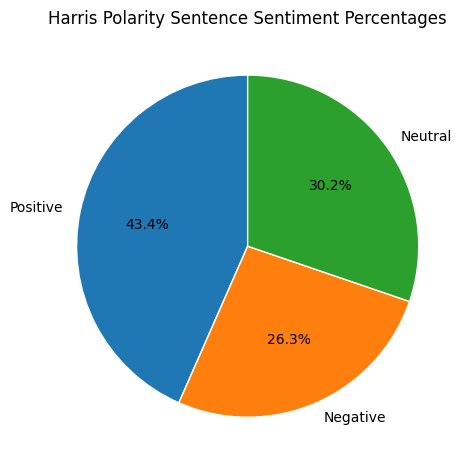

In [9]:
# HARRIS

# Graph


# split polarity into a neutral, positive, and negative
harris_normal_pos = []
harris_normal_neg = []
harris_normal_neutral = []

sentence_pos = []
sentence_neg = []
sentence_neutral = []
n = 0
for value in harris_normal:
    if value > 0.05:
        index = n
        sentence_pos.append(index)
        harris_normal_pos.append(value)

    if value < -0.05:
        index = n
        sentence_neg.append(index)
        harris_normal_neg.append(value)

    if value < .05 and value > -.05:
        index = n
        sentence_neutral.append(index)
        harris_normal_neutral.append(value)

    n += 1



sentence_num = list(range(len(harris_sentence_list)))
plt.plot(sentence_pos, harris_normal_pos, '*-')
plt.plot(sentence_neg, harris_normal_neg, '*-' )
plt.plot(sentence_neutral, harris_normal_neutral, '*-')



plt.title('Harris Polarity')
plt.xlabel('Sentence')
plt.ylabel('Polarity')

plt.plot()
plt.show()

# Pie Chart
harris_pos_count = len(harris_normal_pos)
harris_neg_count = len(harris_normal_neg)
harris_neutral_count = len(harris_normal_neutral)


# Language Popularity; data and label lists must be same length
data_slices = [harris_pos_count, harris_neg_count, harris_neutral_count]
lang_labels = ['Positive', 'Negative', 'Neutral']

# plt.style.use("fivethirtyeight")

# array which specifies the fraction of the radius to offset each wedge.
python_explode = [0, 0, 0]

plt.pie(data_slices, labels=lang_labels, explode=python_explode, shadow=False,
        startangle=90, autopct='%.1f%%', wedgeprops={'edgecolor': 'white'})

plt.title("Harris Polarity Sentence Sentiment Percentages")
plt.tight_layout()
plt.show()



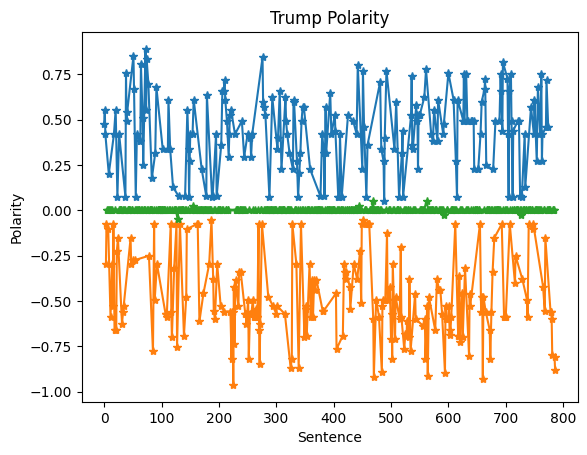

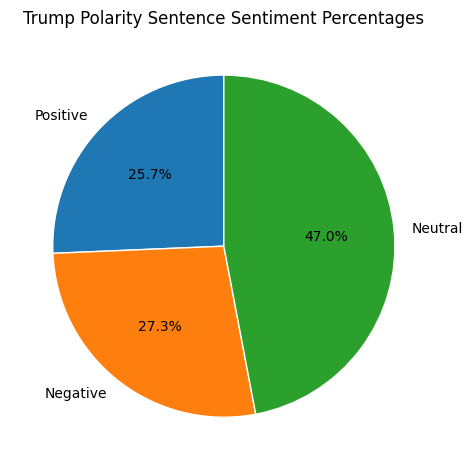

In [10]:
# TRUMP


# split polarity into a neutral, positive, and negative
trump_normal_pos = []
trump_normal_neg = []
trump_normal_neutral = []

sentence_pos = []
sentence_neg = []
sentence_neutral = []
n = 0
for value in trump_normal:
    if value > 0.05:
        index = n
        sentence_pos.append(index)
        trump_normal_pos.append(value)

    if value < -0.05:
        index = n
        sentence_neg.append(index)
        trump_normal_neg.append(value)

    if value < .05 and value > -.05:
        index = n
        sentence_neutral.append(index)
        trump_normal_neutral.append(value)

    n += 1



sentence_num = list(range(len(trump_sentence_list)))
plt.plot(sentence_pos, trump_normal_pos, '*-')
plt.plot(sentence_neg, trump_normal_neg, '*-' )
plt.plot(sentence_neutral, trump_normal_neutral, '*-')



plt.title('Trump Polarity')
plt.xlabel('Sentence')
plt.ylabel('Polarity')

plt.plot()
plt.show()


# Pie Chart


trump_pos_count = len(trump_normal_pos)
trump_neg_count = len(trump_normal_neg)
trump_neutral_count = len(trump_normal_neutral)


# Language Popularity; data and label lists must be same length
data_slices = [trump_pos_count, trump_neg_count, trump_neutral_count]
lang_labels = ['Positive', 'Negative', 'Neutral']


# array which specifies the fraction of the radius to offset each wedge.
python_explode = [0, 0, 0]

plt.pie(data_slices, labels=lang_labels, explode=python_explode, shadow=False,
        startangle=90, autopct='%.1f%%', wedgeprops={'edgecolor': 'white'})

plt.title("Trump Polarity Sentence Sentiment Percentages")
plt.tight_layout()
plt.show()




In [11]:
# Polarity Statistics

# HARRIS


harris_pos_mean = round(mean(harris_normal_pos),3)
harris_neg_mean = round(mean(harris_normal_neg),3)
harris_pos_stdev = round(stdev(harris_normal_pos),3)
harris_neg_stdev = round(stdev(harris_normal_neg),3)
harris_pos_med = round(median(harris_normal_pos),3)
harris_neg_med = round(median(harris_normal_neg),3)
harris_pos_min = round(min(harris_normal_pos),3)
harris_neg_min = round(min(harris_normal_neg),3)
harris_pos_max = round(max(harris_normal_pos),3)
harris_neg_max = round(max(harris_normal_neg),3)


# TRUMP

trump_pos_mean = round(mean(trump_normal_pos),3)
trump_neg_mean = round(mean(trump_normal_neg),3)
trump_pos_stdev = round(stdev(trump_normal_pos),3)
trump_neg_stdev = round(stdev(trump_normal_neg),3)
trump_pos_med = round(median(trump_normal_pos),3)
trump_neg_med = round(median(trump_normal_neg),3)
trump_pos_min = round(min(trump_normal_pos),3)
trump_neg_min = round(min(trump_normal_neg),3)
trump_pos_max = round(max(trump_normal_pos),3)
trump_neg_max = round(max(trump_normal_neg),3)




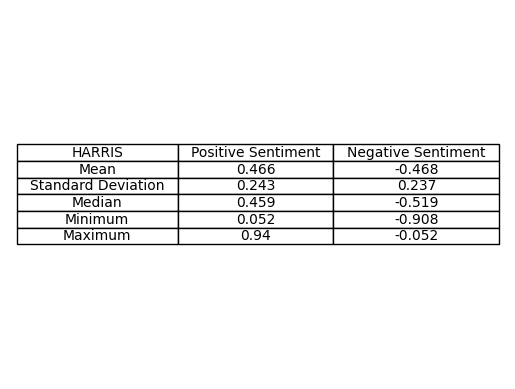

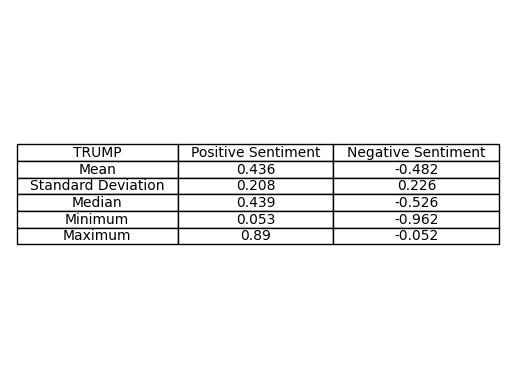

In [12]:
# HARRIS



columns = ["HARRIS", "Positive Sentiment", "Negative Sentiment"]
data = [
    ["Mean", harris_pos_mean, harris_neg_mean],
    ["Standard Deviation", harris_pos_stdev, harris_neg_stdev],
    ["Median",harris_pos_med, harris_neg_med],
    ['Minimum',harris_pos_min, harris_neg_min],
    ['Maximum',harris_pos_max, harris_neg_max]
]

# Create a figure and axis
fig, ax = plt.subplots()
# ax.axis('tight')  # Remove unnecessary space
ax.axis('off')    # Turn off axis

# Create a table
table = ax.table(cellText=data, colLabels=columns, loc="center", cellLoc="center")

# Adjust the font size and appearance
table.auto_set_font_size(True)
# table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(columns))))  # Adjust column widths

# Show the plot
plt.show()



# TRUMP



columns = ["TRUMP", "Positive Sentiment", "Negative Sentiment"]
data = [
    ["Mean", trump_pos_mean, trump_neg_mean],
    ["Standard Deviation", trump_pos_stdev, trump_neg_stdev],
    ["Median",trump_pos_med, trump_neg_med],
    ['Minimum',trump_pos_min, trump_neg_min],
    ['Maximum',trump_pos_max, trump_neg_max]
]

# Create a figure and axis
fig, ax = plt.subplots()
# ax.axis('tight')  # Remove unnecessary space
ax.axis('off')    # Turn off axis

# Create a table
table = ax.table(cellText=data, colLabels=columns, loc="center", cellLoc="center")

# Adjust the font size and appearance
table.auto_set_font_size(True)
# table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(columns))))  # Adjust column widths

# Show the plot
plt.show()

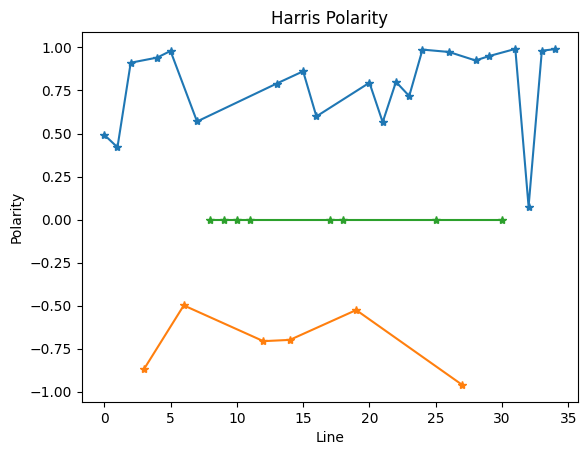

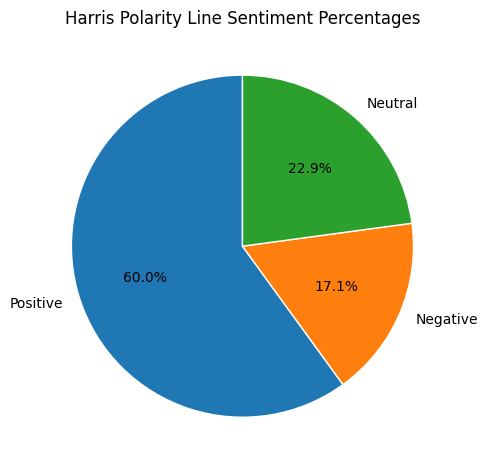

In [13]:
# PART 2!! By Response instead of sentence

# HARRIS
 
# remove stop words 
done_harris_lines = []
current_line = []
done_harris_lines = clear_stops(clean_low_harris,current_line,done_harris_lines)
# print(done_harris_lines)


# 3.


# give words a vader polarity

# print(vader_lines) 
first_elements = []
polarity_element = []

for sublist in vader_lines:
    first_elements.append(sublist[0])
    polarity_element.append(sublist[1])

line_sum = []
lines = []
for line in done_harris_lines:
    # print(line)
    for word in line:
        if word in clean_pos:
            line_sum.append(.293)
        if word in clean_neg:
            line_sum.append(-.293)
        if word in first_elements:
            index = first_elements.index(word)
            line_sum.append(float(polarity_element[index]))
    lines.append(sum(line_sum))
    line_sum = []
# print(sentences)



# normalize sentences 
harris_normal_lines = []
harris_normal_lines = normal(lines, harris_normal_lines)
# print(harris_normal)


# Graph


# split polarity into a neutral, positive, and negative
harris_normal_pos_line = []
harris_normal_neg_line = []
harris_normal_neutral_line = []

line_pos = []
line_neg = []
line_neutral = []
n = 0
for value in harris_normal_lines:
    if value > 0.05:
        index = n
        line_pos.append(index)
        harris_normal_pos_line.append(value)

    if value < -0.05:
        index = n
        line_neg.append(index)
        harris_normal_neg_line.append(value)

    if value < .05 and value > -.05:
        index = n
        line_neutral.append(index)
        harris_normal_neutral_line.append(value)

    n += 1

# print(harris_normal_neg_line)

line_num = list(range(len(clean_low_harris)))
plt.plot(line_pos, harris_normal_pos_line, '*-')
plt.plot(line_neg, harris_normal_neg_line, '*-' )
plt.plot(line_neutral, harris_normal_neutral_line, '*-')



plt.title('Harris Polarity')
plt.xlabel('Line')
plt.ylabel('Polarity')

plt.plot()
plt.show()




# Pie Chart
harris_pos_count_line = len(harris_normal_pos_line)
harris_neg_count_line = len(harris_normal_neg_line)
harris_neutral_count_line = len(harris_normal_neutral_line)


# Language Popularity; data and label lists must be same length
data_slices_line = [harris_pos_count_line, harris_neg_count_line, harris_neutral_count_line]
lang_labels = ['Positive', 'Negative', 'Neutral']

# plt.style.use("fivethirtyeight")

# array which specifies the fraction of the radius to offset each wedge.
python_explode = [0, 0, 0]

plt.pie(data_slices_line, labels=lang_labels, explode=python_explode, shadow=False,
        startangle=90, autopct='%.1f%%', wedgeprops={'edgecolor': 'white'})

plt.title("Harris Polarity Line Sentiment Percentages")
plt.tight_layout()
plt.show()




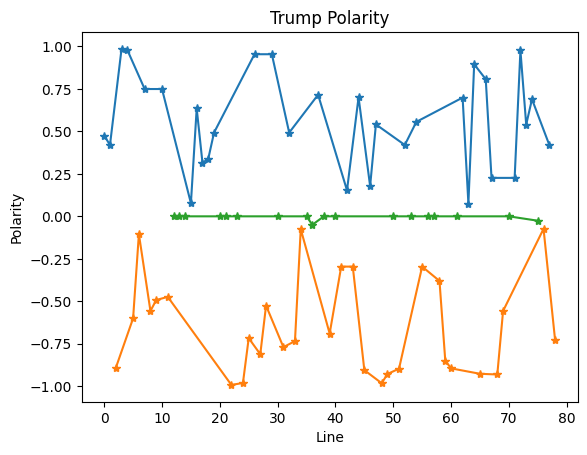

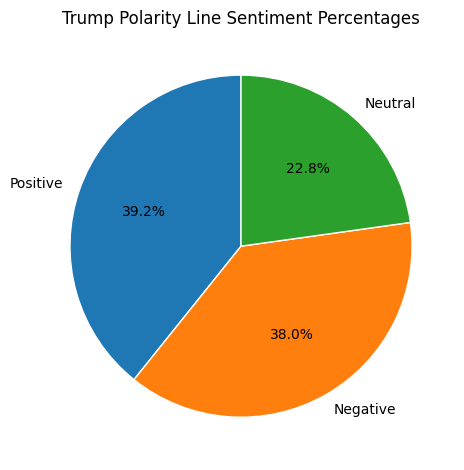

In [14]:
# TRUMP
 
# remove stop words 
done_trump_lines = []
current_line = []
done_trump_lines = clear_stops(clean_low_trump,current_line,done_trump_lines)
# print(done_trump_lines)


# 3.


# give words a vader polarity

# print(vader_lines) 
first_elements = []
polarity_element = []

for sublist in vader_lines:
    first_elements.append(sublist[0])
    polarity_element.append(sublist[1])

line_sum = []
lines = []
for line in done_trump_lines:
    # print(line)
    for word in line:
        if word in clean_pos:
            line_sum.append(.293)
        if word in clean_neg:
            line_sum.append(-.293)
        if word in first_elements:
            index = first_elements.index(word)
            line_sum.append(float(polarity_element[index]))
    lines.append(sum(line_sum))
    line_sum = []
# print(sentences)



# normalize sentences 
trump_normal_lines = []
trump_normal_lines = normal(lines, trump_normal_lines)
# print(trump_normal_lines)


# Graph


# split polarity into a neutral, positive, and negative
trump_normal_pos_line = []
trump_normal_neg_line = []
trump_normal_neutral_line = []

line_pos = []
line_neg = []
line_neutral = []
n = 0
for value in trump_normal_lines:
    if value > 0.05:
        index = n
        line_pos.append(index)
        trump_normal_pos_line.append(value)

    if value < -0.05:
        index = n
        line_neg.append(index)
        trump_normal_neg_line.append(value)

    if value < .05 and value > -.05:
        index = n
        line_neutral.append(index)
        trump_normal_neutral_line.append(value)

    n += 1

# print(trump_normal_neg_line)

line_num = list(range(len(clean_low_trump)))
plt.plot(line_pos, trump_normal_pos_line, '*-')
plt.plot(line_neg, trump_normal_neg_line, '*-' )
plt.plot(line_neutral, trump_normal_neutral_line, '*-')



plt.title('Trump Polarity')
plt.xlabel('Line')
plt.ylabel('Polarity')

plt.plot()
plt.show()


# Pie Chart

trump_pos_count_line = len(trump_normal_pos_line)
trump_neg_count_line = len(trump_normal_neg_line)
trump_neutral_count_line = len(trump_normal_neutral_line)


# Language Popularity; data and label lists must be same length
data_slices_lines = [trump_pos_count_line, trump_neg_count_line, trump_neutral_count_line]
lang_labels = ['Positive', 'Negative', 'Neutral']


# array which specifies the fraction of the radius to offset each wedge.
python_explode = [0, 0, 0]

plt.pie(data_slices_lines, labels=lang_labels, explode=python_explode, shadow=False,
        startangle=90, autopct='%.1f%%', wedgeprops={'edgecolor': 'white'})

plt.title("Trump Polarity Line Sentiment Percentages")
plt.tight_layout()
plt.show()


